# The first test of the new jax rapid rotator model on real data! 

## CHARA PAVO observations of the star $\upsilon$ UMa

In [4]:
import numpy as np

import matplotlib.pyplot as plt

#this is the way I've found to get jax to use multiple CPU cores on Apple Silicon
import os
os.environ["XLA_FLAGS"] = "--xla_force_host_platform_device_count=2"

# add the root directory to path to allow import of the uniform disk model
import sys
sys.path.append("..")
from core.uniformdisks import jinc, vis_ud
from core.ELR import ELR_Model

import jax
from jax.config import config
config.update("jax_enable_x64", True)
import jax.numpy as jnp
from jax import grad, jit, vmap, jacfwd, jacrev

import numpyro
from numpyro import distributions as dist, infer

from numpy import genfromtxt
import pandas as pd
import arviz as az
import corner

In [5]:
try:
    from colorpy import ciexyz
    from colorpy import colormodels
    colorpy_exists=True
except:
    colorpy_exists=False
    from matplotlib import cm

## Reading in $\upsilon$ UMa data from file:

In [6]:
df = pd.read_csv('upsUMa_l0l1.res_l1l2.res',delim_whitespace=True,comment='#',header=0)
df = df[(df.V2CALERR>0.0)]

In [7]:
u = df[df['STAR']=='HD_84999']['UCOORDS'].values
v = df[df['STAR']=='HD_84999']['VCCORDS'].values
wav = df[df['STAR']=='HD_84999']['LAMBDA'].values
v2 = df[df['STAR']=='HD_84999']['V2CAL'].values
v2_err = df[df['STAR']=='HD_84999']['V2CALERR'].values

In [8]:
if colorpy_exists:
    irgb = []
    for i in wav:
        xyz = ciexyz.xyz_from_wavelength(i*1000)
        irgb.append(colormodels.irgb_from_xyz(xyz))
    irgb = np.array(irgb)/255
else:
    irgb = cm.jet(wav)

## Baseline coverage:

Here, I've plotted the U, V plane coverage of the data, colored by the wavelength. As an unncesseary extra, I've also made it color-accurate to the real wavelength. Most of CHARA is in the IR, with just a little in the red optical. 

Text(0, 0.5, 'V (baseline/$\\lambda$)')

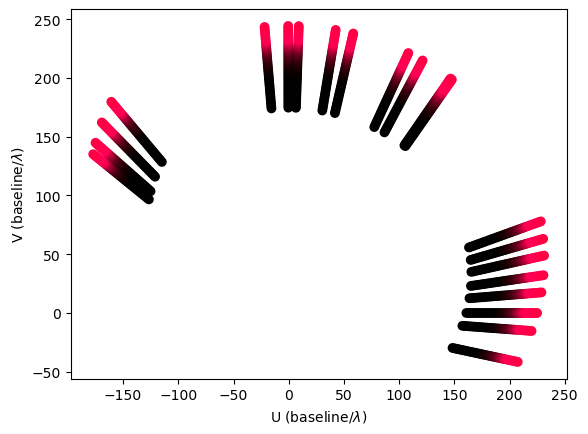

In [9]:
plt.scatter(u/wav,v/wav, c=irgb)
plt.xlabel(r"U (baseline/$\lambda$)")
plt.ylabel(r"V (baseline/$\lambda$)")